# **SANSKAR SINGH (Group-6)**
# Linear Classifiers and Perceptron Algorithm

In this lab, we will be studying the use of linear classifiers, followed by using perceptron learning algorithm.

**Linear classifiers** can be understood as form of **classifiers** (which will classify things into two different output categories) and we are doing this by **involving a linear equation**.

## Let's understood how line can classify datapoints using an example:<br>
Given a line as G(X), where X are values of different features given in (d+1)-dimensioanl vector form:<br>
$G(X) = w^TX = 6x_1 + 3x_2 - 12$<br>
(Here, d=2 and w = [6,3,-12], we are assuming the augmented version of w or coefficient vector)

Let's make a toy dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,2,1]])

import random
for i in range(10):
  x_1 = random.randint(0,3)
  x_2 = random.randint(0,5)
  X = np.asarray([[x_1, x_2, 1]]) # adding bias term at the end for augmented version of X as well
  points = np.append(points, X, axis=0)

print(points)

[[1 2 1]
 [1 1 1]
 [2 1 1]
 [3 1 1]
 [2 2 1]
 [3 5 1]
 [1 3 1]
 [1 2 1]
 [3 4 1]
 [0 1 1]
 [0 3 1]]


In [ ]:
# We have w or coefficients vector as
w = np.asarray([6,3,-12])

In [ ]:
# Now let's do the linear classification
# we do it by checking the value of G(X)

def linClassification(w, points):
  for point in points:
    gx = 0
    for i in range(len(w)):
      gx+=w[i]*point[i]
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

def linClassification_VectorialForm(w, points):
  for point in points:
    gx = np.sum(w*point)
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

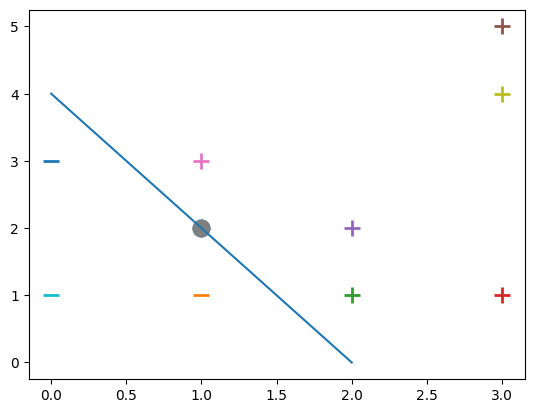

In [ ]:
# Lets first plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification(w, points)
plt.show()

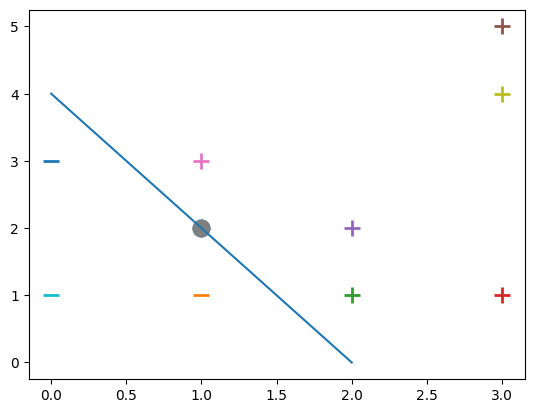

In [ ]:
# Now let's check what happens if we do it vector from

# First plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification_VectorialForm(w, points)
plt.show()

So, we can see that how line can classify the data points. And we understand how it is done. But how do we get to know the correct line which would stand as our answer for the dataset.

So, to get the required line, we will try to understand various Linear Classifiers.

### First we have Perceptron Update algorithm to find the required line

We can now code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set.

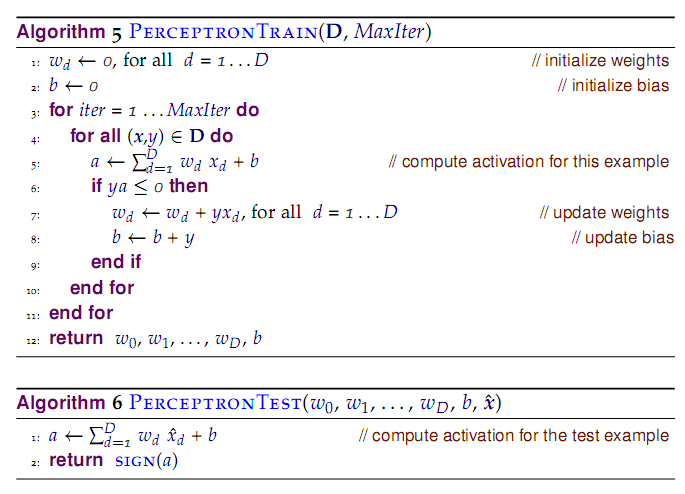

By checking **$y.a <= 0$**, misclassifed data-points have been checked and update is being done accordingly.

For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop(s) (i.e, **Batch Perceptron Update**).

The below mentioned algorithm is shown in the above image.

In [ ]:
# Creating the labeled dataset for the example simulation of above shown algorithm
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, 1, 1])


In [ ]:
def perceptron_algo(X, Y):
    # random line is being called to start the algorithm
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
# Let's analyse the algorithm against number of iterations needed
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(n):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

Next, we will see the the training error at each epoch.

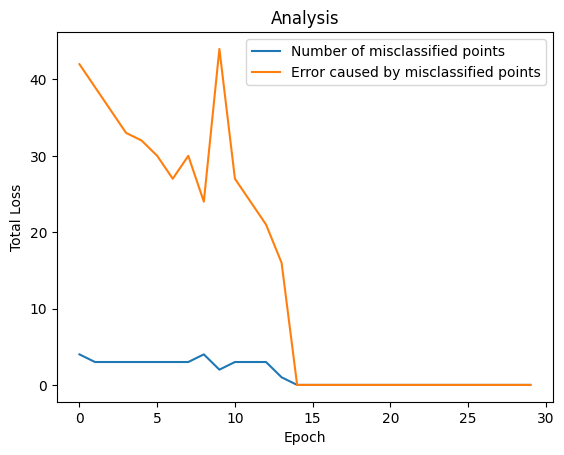

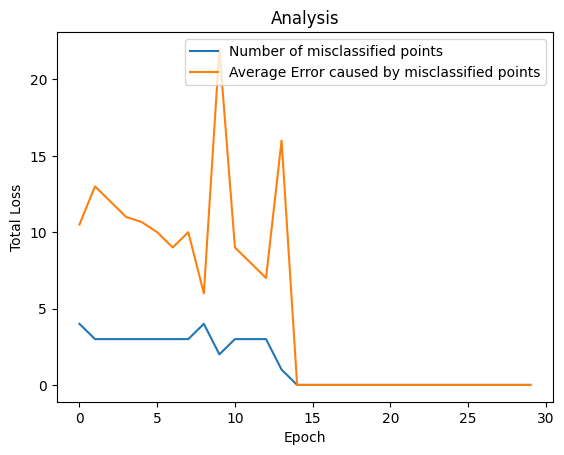

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

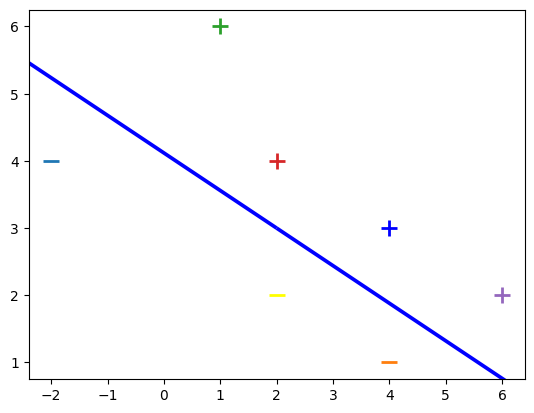

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   In our case eta or the learning rate is equal to 1. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3.   Also try to understand what is happening analytically, if you are increasing or decreasing the learning rate, how it can be helpful to you?
    - [Understanding Learning Rates and How It Improves Performance in Deep Learning](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10). Try to get the gist of the blog, would be more clearer in the later part of the course.
5.   Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
    - [Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182).
6.   Perceptron algorithm trains the model in the manner such that it **just** answers the question according to the training data but does not give the most optimal answer, in the manner that it does not maximizes the seperability from both the classes and thus have a chance of not doing well in validation or testing data. How will you try to solve this problem? Note your observation.
    - [Perceptron vs SVM: a quick comparison](https://medium.com/@subashkharel/perceptron-vs-svm-a-quick-comparison-6b5d6b5d64f). Try to read more such Medim or TowardsDataScience articles for understanding more about Machine Learning.
7.   Can this method or some extension on this be used for classifying more than two classes at once. Note your observations.

1.Trying on a real dataset like the Sonar dataset 

In [ ]:
import pandas as pd
df=pd.read_csv("/content/sonar.all-data(1).csv")
df.head()


,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [ ]:
k=np.linspace(-1, -1, len(df))
l=np.linspace(1,1,len(df))
k

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [ ]:
import random as rd
nl=[]
m=[k,l]
for i in range(len(df)):
  j=rd.randrange(0,2)
  nl.append(m[j][i])


In [ ]:
df['']=pd.Series(k)
df.values
X=df.values
y=np.array(nl)

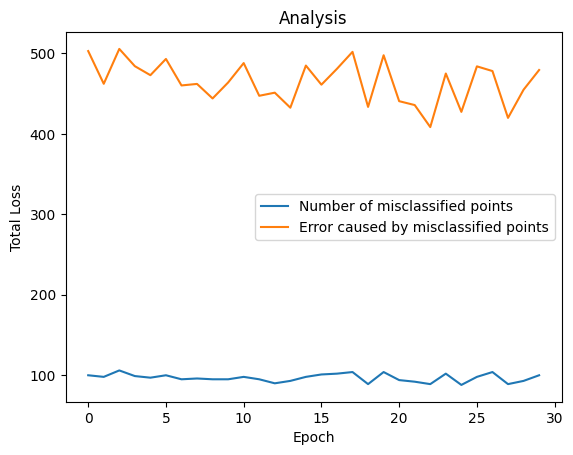

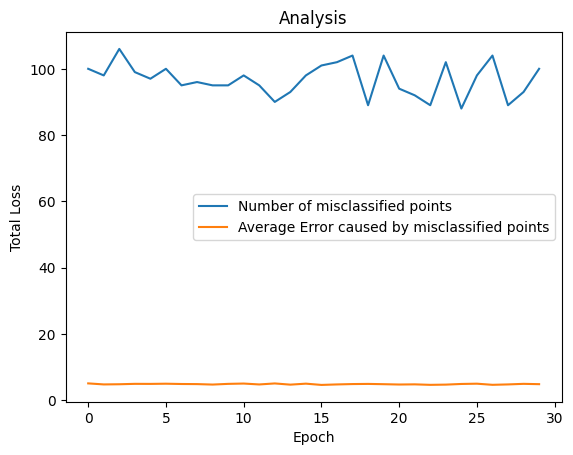

array([ -4.3428,  -2.1337,  -0.811 ,  -8.2262,   0.3835,   6.9616,
        -4.3896,  -1.4618, -17.2731,   5.0386,   6.9772,   5.2336,
         3.9029,  -5.1875,  -2.9348,  -9.6372,   3.5379,  -1.2463,
        10.5075,   0.5894,   5.2376,  -3.0912,   8.0765,  -1.3672,
        -4.4884,   9.5157,  -8.4234,   8.0205,  -0.0805,  10.5228,
        -2.8029,  -7.5989,   5.5401,   9.7753,   5.3959,   6.2521,
        -2.6345,  -2.3718,   6.956 , -20.7858,   1.2872,  -3.6369,
        -3.6394,  12.0657,   0.7934,  -6.7344,   8.406 ,  11.1668,
         6.0666,  -0.1663,   0.9805,   0.4563,   0.5093,   0.5696,
         0.9916,   0.8264,   1.9915,   0.6333,   0.1731,  -0.8063,
        14.    ])

In [ ]:
perceptron_algo_plot(X, y)

2.Increasing/decreasing the learning rate to see how many iterations will ittake to coverge and checking if it converges on a huge learning rate.

In [ ]:
def perceptron_algo1(X, Y):
    w1 = np.zeros(len(X[0]))
    eta = 200
    epochs = 50

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w1) * Y[i]) <= 0:
                w1 = w1 + eta * X[i] * Y[i]
    return w1

In [ ]:
def perceptron_algo_plot1(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w1 = np.zeros(len(X[0]))
    eta = 200
    n = 60
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w1) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w1) * Y[i])
                w1 = w1 + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w1

In [ ]:
perceptron_algo1(X, y)

array([-1367.92,  -657.94,  -262.3 , -2651.94,   345.36,  2144.1 ,
       -1804.2 ,   192.42, -4562.82,  1569.9 ,  1881.24,  1074.08,
        1084.56, -1375.74,  -349.58, -2369.24,  1116.24,  -205.4 ,
        2308.42,   309.72,  1305.88,  -942.26,  1797.34,   -65.62,
       -1104.18,  2734.1 , -2335.86,  2619.58, -1093.18,  2580.04,
        -658.38, -1203.74,  1111.02,  1696.48,   587.82,  1407.28,
        -807.3 ,  -889.18,  2240.66, -5547.22,  1495.7 , -1101.36,
       -1831.9 ,  3465.94,   -18.94, -2450.04,  1962.26,  2579.06,
        1370.88,   -27.16,   291.26,    91.24,   151.1 ,   182.9 ,
         299.08,   305.1 ,   635.28,   201.  ,    78.84,  -239.32,
        3200.  ])

array([-1433.4 ,  -638.58,  -329.4 , -3038.12,   576.52,  2542.86,
       -2139.56,   301.26, -5350.4 ,  1630.22,  1877.54,   979.3 ,
        1031.66, -1431.52,   249.28, -2242.76,  1253.58,  -496.8 ,
        2000.64,  -298.04,  1265.52,  -783.32,  1638.6 ,   101.7 ,
       -1276.3 ,  2985.72, -2539.92,  3137.62, -1303.06,  2764.82,
        -662.3 , -1334.76,   823.  ,  1044.58,     9.68,  1705.88,
        -766.04, -1246.86,  2604.  , -5545.44,  2147.28, -1161.72,
       -2258.22,  3732.36,   -30.62, -2484.12,  2418.64,  2795.26,
        1486.14,    -7.6 ,   338.78,   132.84,   191.5 ,   223.18,
         354.72,   332.42,   746.88,   236.2 ,   103.14,  -265.64,
        3600.  ])

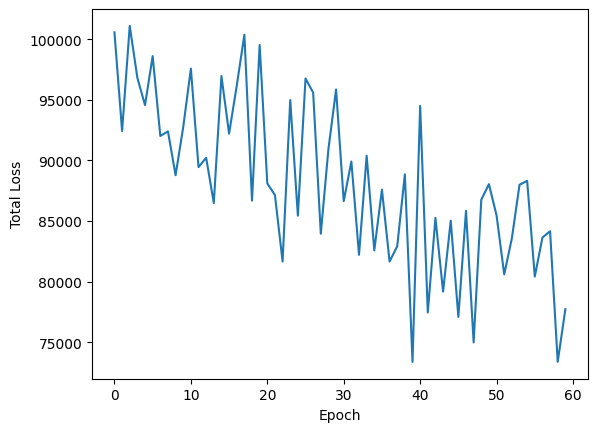

In [ ]:
perceptron_algo_plot1(X, y)

3.If we increase the learning rate the total loss attained is high
We have to select the learning rate such that it would be optimal for the model and also would mean lesser time for us to train the model.

5.There are a few ways to solve the problem of the perceptron algorithm not maximizing the separability from both the classes and thus having a chance of not doing well in validation or testing data.

One way is to use a larger training dataset. A larger training dataset will give the perceptron algorithm more data to learn from, which will help it to better understand the relationship between the input features and the output labels. This will make it more likely that the perceptron algorithm will be able to generalize well to new data, even if the new data is not perfectly linearly separable.

6.No, the perceptron algorithm cannot be used to classify more than two classes at once. It is a linear classifier, which means that it can only learn a linear decision boundary between two classes. For more than two classes, the decision boundary would need to be nonlinear, which the perceptron algorithm cannot do.
Either we can classify one class vs another or one class vs all the other classes using this algorithm

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

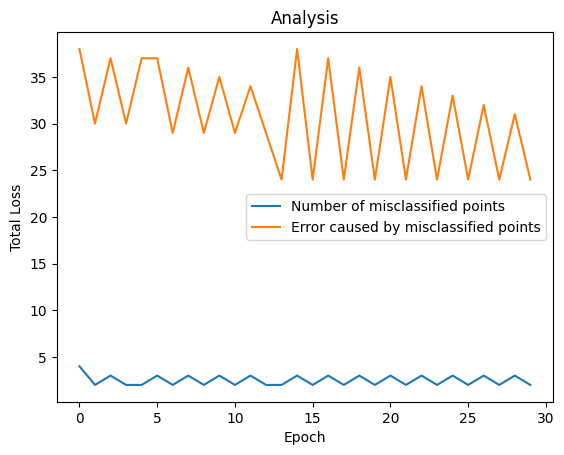

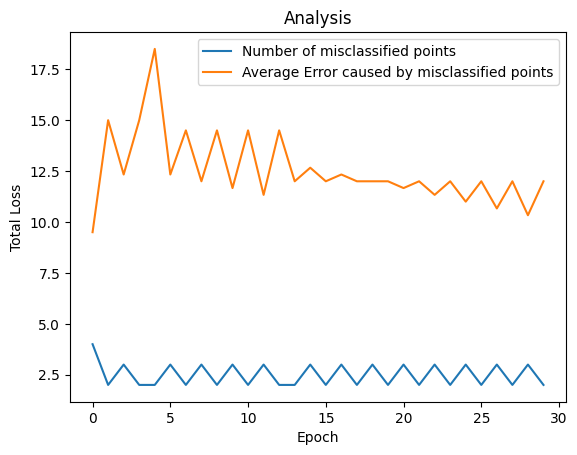

[-2.  3. 15.]


In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.